In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [3]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [4]:
# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [5]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
cv2.ocl.setUseOpenCL(False)

In [7]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
# Train the neural network/model
emotion_model_info = emotion_model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 64
)

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 279s 612ms/step - accuracy: 0.2493 - loss: 1.8264 - val_accuracy: 0.3535 - val_loss: 1.7185
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 140us/step - accuracy: 0.3281 - loss: 1.7058 - val_accuracy: 0.5000 - val_loss: 1.5357
Epoch 3/50


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 128s 285ms/step - accuracy: 0.3469 - loss: 1.6662 - val_accuracy: 0.3965 - val_loss: 1.5545
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 105us/step - accuracy: 0.4531 - loss: 1.5522 - val_accuracy: 0.6000 - val_loss: 1.5493
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 129s 287ms/step - accuracy: 0.3981 - loss: 1.5596 - val_accuracy: 0.4348 - val_loss: 1.4708
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 105us/step - accuracy: 0.4219 - loss: 1.4835 - val_accuracy: 0.4000 - val_loss: 1.9589
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 124s 277ms/step - accuracy: 0.4301 - loss: 1.4802 - val_accuracy: 0.4688 - val_loss: 1.4012
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.3438 - loss: 1.6358 - val_accuracy: 0.3000 - val_loss: 1.6251
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 131s 292ms/step - accuracy: 0.4609 - loss: 1.4150 - val_accuracy: 0.4870 - val_loss: 1.3558
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 105us/step - accuracy: 0.4219 - loss: 1.4125 - va

In [9]:
val_loss, val_accuracy = emotion_model.evaluate(validation_generator, steps=7178 // 64)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

112/112 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - accuracy: 0.6039 - loss: 1.0631
Validation Loss: 1.0816842317581177
Validation Accuracy: 0.6011439561843872


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
test_loss, test_accuracy = emotion_model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.5976 - loss: 1.0949
Test Accuracy: 60.13%


In [11]:
# Generate predictions
Y_pred = emotion_model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = validation_generator.classes

# Classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred, target_names=class_labels))


113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step
              precision    recall  f1-score   support

       angry       0.14      0.14      0.14       958
     disgust       0.01      0.01      0.01       111
        fear       0.13      0.09      0.11      1024
       happy       0.25      0.28      0.27      1774
     neutral       0.18      0.16      0.17      1233
         sad       0.16      0.19      0.18      1247
    surprise       0.12      0.11      0.11       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



In [12]:
# Precision, Recall, F1 Score
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

In [13]:
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Precision: 0.17
Recall: 0.18
F1 Score: 0.17


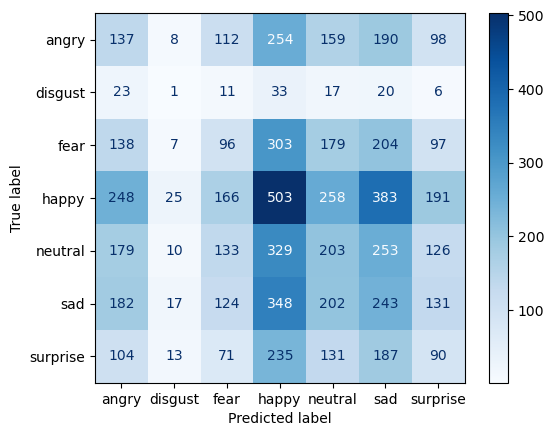

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

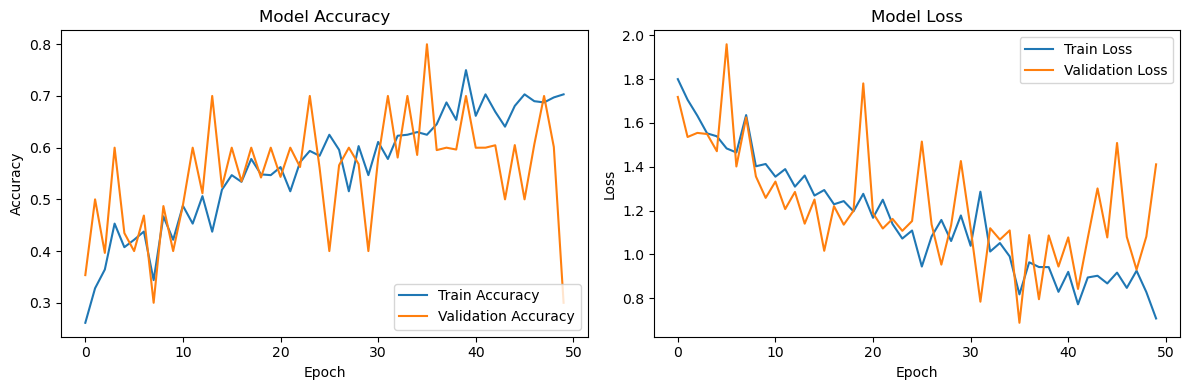

In [15]:
# Plot accuracy graph
history = emotion_model_info.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [16]:
emotion_model.save('final_train.h5')